<a href="https://colab.research.google.com/github/rosegebhardt/Frequentist-ML/blob/master/gradient_boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xgboost

In [ ]:
#----------INCLUDE PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#----------DATA READING 

data = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
dataframe = pd.read_csv(data, sep=',', header=None)

In [ ]:
#----------CLEAN DATA

# Drop rows with missing data
clean_data = dataframe.dropna(axis=0)

# Rename columns
clean_data.columns = ['times_pregnant','glucose','blood_pres','skin_thickness','insulin','bmi','diabetes_fcn','age','class_value'] 

# Remove rows with invalid data
clean_data = clean_data[clean_data['glucose'] > 0] 
clean_data = clean_data[clean_data['blood_pres'] > 0] 
clean_data = clean_data[clean_data['skin_thickness'] > 0] 
clean_data = clean_data[clean_data['insulin'] > 0] 
clean_data = clean_data[clean_data['bmi'] > 0] 

# Show data information                    
clean_data.describe()

,times_pregnant,glucose,blood_pres,skin_thickness,insulin,bmi,diabetes_fcn,age,class_value
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#----------SEPARATE DATA

# Choose seed
np.random.seed(420)

# Separate training and testing data
train_data, validate_data, test_data = np.split(clean_data.sample(frac=1), [int(.8*len(clean_data)), int(.9*len(clean_data))])

# Separate training inputs and outputs
x_train = train_data.drop(['class_value'], axis=1)  
y_train = train_data['class_value']

# Separate validation inputs and outputs
x_validate = validate_data.drop(['class_value'], axis=1)  
y_validate = validate_data['class_value']

# Separate testing inputs and outputs
x_test = test_data.drop(['class_value'], axis=1)
y_test = test_data['class_value']

# Normalize testing validation and training inputs
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min()) 
x_validate = (x_validate-x_validate.min())/(x_validate.max()-x_validate.min()) 
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

In [ ]:
#----------REGULAR GRADIENT BOOSTED TREES

# Create array of possible lambdas
gamma_vect = np.linspace(0,0.1,num=100)

# Initialize accuracy values
vals = np.zeros(gamma_vect.shape)

# Find the accuracy for each lambda
for index,val in enumerate(alpha_vect):
  xg_classify = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.01, min_split_loss = val)
  xg_classify.fit(x_train,y_train)
  pred = xg_classify.predict(x_validate)
  accuracy = sum(pred == y_validate)/len(y_validate)
  vals[index] = accuracy

# Find alpha that maximizes the accuracy
maxpos = np.where(vals == vals.max())
best_gamma = gamma_vect[maxpos]

# Use best alpha value to train the model
xg_classify = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.01, min_split_loss = best_gamma[-1])
xg_classify.fit(x_train,y_train)

# Find the prediction accuracy on the testing set
pred = xg_classify.predict(x_test)
accuracy = 100*sum(pred == y_test)/len(y_test)
print("The accuracy on the test set using gradient boosted trees is", accuracy, "%.")


The accuracy on the test set using gradient boosted trees is 77.5 %.


<Figure size 8640x6480 with 0 Axes>

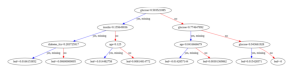

<Figure size 648x648 with 0 Axes>

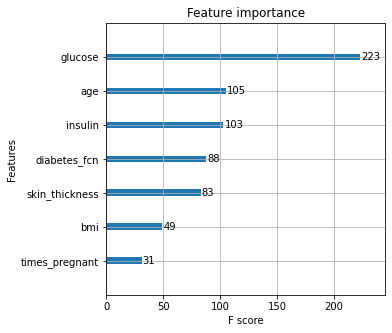

In [ ]:
#----------GRADIENT BOOSTED TREES PLOTS

# Plot tree
fig1 = plt.figure(figsize = (120,90))
xgb.plot_tree(xg_classify,num_trees=0)
plt.show()

# Feature importance
fig2 = plt.figure(figsize = (9,9))
xgb.plot_importance(xg_classify)
plt.show()

In [ ]:
#----------L2 PENALTY

# Create array of possible lambdas
lambda_vect = np.linspace(0,0.1,num=100)

# Initialize accuracy values
vals = np.zeros(lambda_vect.shape)

# Find the accuracy for each lambda
for index,val in enumerate(lambda_vect):
  xg_classify_rr = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.01, reg_lambda = val)
  xg_classify_rr.fit(x_train,y_train)
  pred_rr = xg_classify_rr.predict(x_validate)
  accuracy_rr = sum(pred_rr == y_validate)/len(y_validate)
  vals[index] = accuracy_rr

# Find alpha that maximizes the accuracy
maxpos = np.where(vals == vals.max())
best_lambda = lambda_vect[maxpos]

# Use best alpha value to train the model
xg_classify_rr = xgb.XGBClassifier(objective ='reg:logistic', learning_rate = 0.01, reg_lambda = best_lambda[-1])
xg_classify_rr.fit(x_train,y_train)

# Find the prediction accuracy on the testing set
pred_rr = xg_classify_rr.predict(x_test)
accuracy_rr = 100*sum(pred_rr == y_test)/len(y_test)
print("The accuracy on the test set using ridge regression gradient boosted trees is", accuracy_rr, "%.")

The accuracy on the test set using ridge regression gradient boosted trees is 77.5 %.


<Figure size 8640x6480 with 0 Axes>

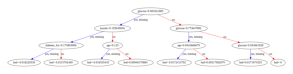

<Figure size 648x648 with 0 Axes>

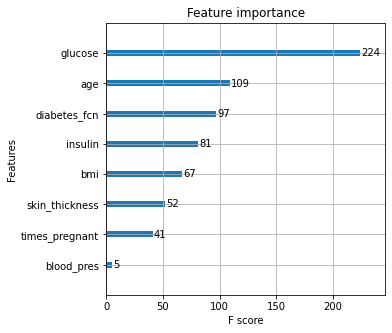

In [ ]:
#----------L2 PENALTY PLOTS

# Plot tree
fig1 = plt.figure(figsize = (120,90))
xgb.plot_tree(xg_classify_rr,num_trees=0)
plt.show()

# Feature importance
fig2 = plt.figure(figsize = (9,9))
xgb.plot_importance(xg_classify_rr)
plt.show()
